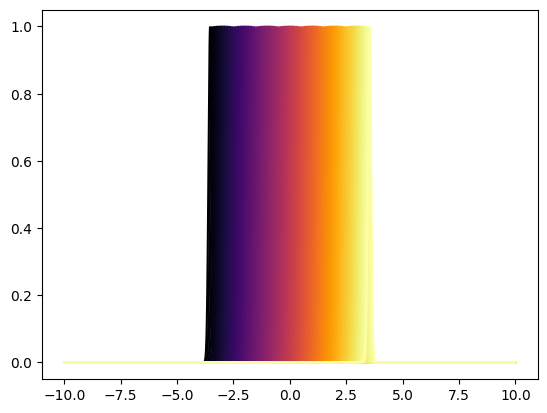

In [25]:
import numpy as np
import matplotlib.pyplot as plt

my_h = 0.1
#Generate x data to plot the functions
x_grid = 0.01
x_values = np.arange(-10,10, x_grid)

#Here our h = 0.02
def my_rbf(x,c, h=my_h):
    return np.exp((-(x-c)**2)/(h**2))
my_root_2 = np.sqrt(2)
my_centres = ((np.arange(1, 102) - 51) * my_h) / my_root_2
number_of_features = 101

#(2000,100) (n*p) array of y values where each row is the 100 rbf functions 
y_values = my_rbf(x_values[:, np.newaxis], my_centres)

# Retrieve the colormap
colormap = plt.colormaps['inferno']  # 'coolwarm' transitions from red to blue

# Generate a colormap
colors = colormap(np.linspace(0, 1, 101))
plt.clf()


for i in range(101):
    plt.plot(x_values, y_values[:, i], '-', color=colors[i])

plt.show()

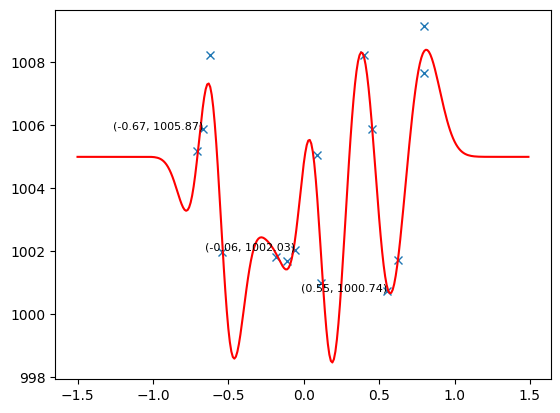

In [26]:
#generate 70 x label input data in [-1,1]

#Here our h = 0.02
def my_scaled_rbf(x,c, h=my_h,scale=1):
    return scale*np.exp((-(x-c)**2)/(h**2))
my_scaled_rng = np.random.default_rng()

my_bias = 1005

my_scaled_regularizer = 1
my_scaled_sample_size = 15

my_scaled_x_data = np.sort(my_scaled_rng.uniform(-1,1,my_scaled_sample_size))

my_scaled_y_data = my_scaled_rng.uniform(1000,1010, my_scaled_sample_size)

scaled_phi_feature_values = my_scaled_rbf(my_scaled_x_data[:, np.newaxis], my_centres, scale = 5)
#print(scaled_phi_feature_values[:10,:3])

scaled_regularizing_matrix = np.sqrt(my_scaled_regularizer)*np.eye(number_of_features)

scaled_augmented_unbiased_y_values = np.hstack(((my_scaled_y_data - my_bias), np.zeros(number_of_features)))

scaled_augmented_feature_values = np.vstack((scaled_phi_feature_values,scaled_regularizing_matrix))




#Fit weights using np.linalg.lstsq
scaled_fitted_weights = np.linalg.lstsq(scaled_augmented_feature_values, scaled_augmented_unbiased_y_values, rcond=None)[0]
#for weight in scaled_fitted_weights:
#    if weight > 0.1:
#        print(f"{weight:.1f}")

#Plot the function we get
def fitted_function(x):
    return np.dot(scaled_fitted_weights, my_scaled_rbf(x, my_centres, scale=5)) + my_bias

#Generate data to plot graph:
scaled_graph_x_data = np.arange(-1.5,1.5, 0.01)

#Function values for those data points:
scaled_graph_function_data = [fitted_function(x) for x in scaled_graph_x_data]



plt.clf()
plt.plot(my_scaled_x_data, my_scaled_y_data, 'x')
# Add labels to data points
for i in range(1, my_scaled_sample_size, 5):
    plt.text(my_scaled_x_data[i], my_scaled_y_data[i], f'({my_scaled_x_data[i]:.2f}, {my_scaled_y_data[i]:.2f})', fontsize=8, ha='right')
plt.plot(scaled_graph_x_data, scaled_graph_function_data, '-r')
plt.show()